In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

In [ ]:
# If true, the WAV files will be read and their features will be saved in the CSV files
# As this is the most time consuming task, only enable it if you don't have the CSV files yet
CREATE_CSV_FILES = True

In [ ]:
# Defines the names of the CSV files
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
#MORE_TRAIN_CSV_FILE = "more_train.csv"
#MORE_TEST_CSV_FILE = "more_test.csv"

In [ ]:

def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = 'real fake'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=3)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("data/test", TEST_CSV_FILE) 
    extractWavFeatures("data/train", TRAIN_CSV_FILE)
   
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder data/test will be saved to test.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder data/train will be saved to train.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
CSV files are created


In [ ]:
#Reading a dataset 

import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    filenameArray = data['filename'] 
    soundArray = []
    
    for i in range(len(filenameArray)):
        sound = filenameArray[i][4]
        if sound == "f":
            sound = "0"
        else: 
            sound = "1"
        soundArray.append(sound)
    data['fake(0)/real(1)'] = soundArray
    
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data)
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)

train.csv will be preprocessed
Preprocessing is finished
          rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.034180        1668.499512         1931.042986  3549.831355   
1     0.021000        2285.333847         2078.051071  4437.413424   
2     0.050395        2520.792678         2095.533805  4588.145846   
3     0.033419        1244.333072         1363.402056  2314.322416   
4     0.155624         610.774970         1354.636615  1060.675894   
...        ...                ...                 ...          ...   
1721  0.048439        2388.029478         2371.731559  4676.266339   
1722  0.021571        1974.492901         1784.187394  4006.086801   
1723  0.026254        2469.095902         2081.365811  4407.598220   
1724  0.086118        2466.251183         1995.966252  4459.277907   
1725  0.015375        2224.121561         2600.205771  5107.592961   

      zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0               0.075883 -31

In [ ]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype=float)
y = np.array(trainData.iloc[:, -1], dtype=float)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
#print(y)

X_test = np.array(testData.iloc[:, :-1], dtype=float)
y_test = np.array(testData.iloc[:, -1], dtype=float)
print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)

Y from training data: (1380,)
Y from validation data: (346,)
Y from test data: (134,)


In [ ]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

X from training data (1380, 25)
X from validation data (346, 25)
X from test data (134, 25)


In [ ]:
#Creating a Model
from keras import models
from keras import layers
import keras
from datetime import datetime
import tensorflow as tf


# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))



# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy) 



start = datetime.now()
#training
history = model.fit(X_train,
                    y_train,
                    validation_split=(0.1),
                    epochs=135,
                    batch_size=128)


duration = datetime.now() - start
print("Training completed in time: ", duration)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               6656      
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_27 (Dropout)        (None, 64)               

In [ ]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9963768124580383
Testing Accuracy:  0.9552238583564758


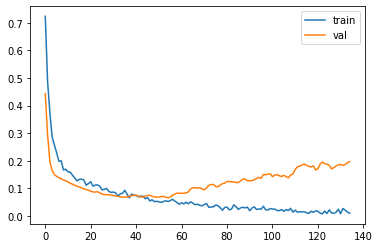

In [ ]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

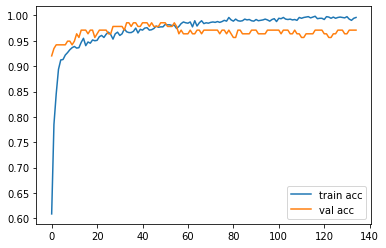

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
def getSound(sound):
    sound = str(sound)
    if sound == "0":
        return "fake"
    else: 
        return "real"
        
def printPrediction(X_data, y_data, printDigit):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        prediction = getSound(model.predict(X_data[i:i+1])[0])
        sound = getSound(y_data[i])
        if printDigit == True:
            print("Number={0:d}, y={1:10s}- prediction={2:10s}- match={3}".format(i, sound, prediction, sound==prediction))
        else:
            print("y={0:10s}- prediction={1:10s}- match={2}".format(sound, prediction, sound==prediction))
            

In [ ]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
def report(X_data, y_data):
    #Confution Matrix and Classification Report
    Y_pred = np.argmax(model.predict(X_data), axis=-1)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    ax = sns.heatmap(conf_mt, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
    plt.show()
    print('\nClassification Report')
    target_names = ["real", "fake"]
    print(classification_report(y_test_num, Y_pred))

In [ ]:
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10],False)


# TEST DATA #

5/5 [==============================] - 0s 3ms/step - loss: 0.8085 - accuracy: 0.9552
accuracy: 95.52%

# Generate predictions
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True
y=real      - prediction=real      - match=True


In [ ]:
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(y_pred)

[0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]


Classification Report for Test Data



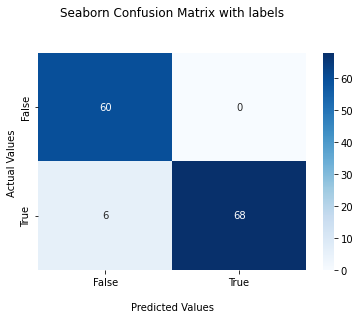


Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.92      0.96        74

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



In [ ]:
print("Classification Report for Test Data\n")
report(X_test, y_test)

Classification Report for Train Data



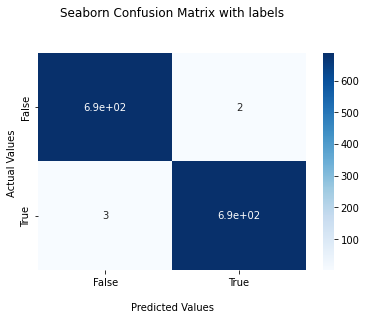


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       689
           1       1.00      1.00      1.00       691

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380



In [ ]:
print("Classification Report for Train Data\n")
report(X_train, y_train)

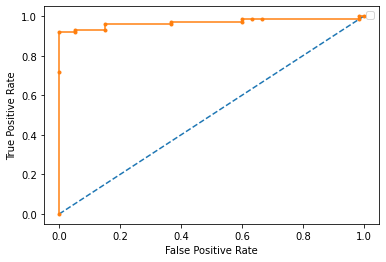

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
yhat = model.predict(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

No Skill ROC AUC 0.969
Logistic ROC AUC 0.958


In [ ]:
yh=history.params
print(yh)

{'verbose': 1, 'epochs': 120, 'steps': 13}


In [ ]:
yh=history.history
print(yh)

{'loss': [0.7782172560691833, 0.4683053493499756, 0.31775662302970886, 0.26963186264038086, 0.23639900982379913, 0.21998490393161774, 0.19551502168178558, 0.17994561791419983, 0.1822541356086731, 0.17209768295288086, 0.15388554334640503, 0.14778359234333038, 0.14217382669448853, 0.14015431702136993, 0.12603025138378143, 0.126373752951622, 0.12174396216869354, 0.1356203854084015, 0.10577891021966934, 0.1133042722940445, 0.10368920117616653, 0.12046141922473907, 0.09728417545557022, 0.09796981513500214, 0.09593746811151505, 0.09188137203454971, 0.09771446883678436, 0.09091797471046448, 0.086665578186512, 0.08851924538612366, 0.09580667316913605, 0.08784028887748718, 0.08577744662761688, 0.08654705435037613, 0.08391391485929489, 0.07633104175329208, 0.07360579818487167, 0.06517801433801651, 0.0762566402554512, 0.08566223084926605, 0.07997263222932816, 0.08339912444353104, 0.06742870062589645, 0.07265671342611313, 0.06925587356090546, 0.06718392670154572, 0.06576446443796158, 0.05997778847

In [ ]:
from sklearn.metrics import roc_curve
pred_prob1 = model.predict_proba(X_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)

0.9581081081081082


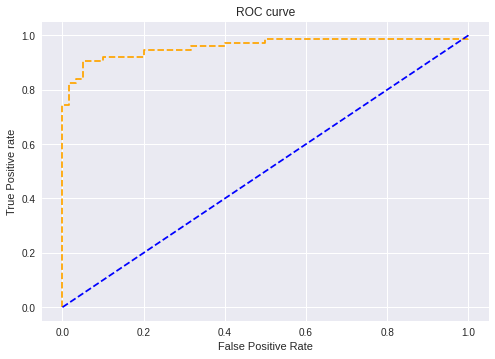

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();